# **Import library!**

In [326]:
# Import Neccessary libraries

import numpy as np

import pandas as pd



# Import Visualization libraries

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns



#Import Model

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import  LabelEncoder

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report,f1_score

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.ensemble import GradientBoostingClassifier



#import warning libraries

import warnings

warnings.filterwarnings('ignore')

# **Read Data**

In [327]:
diabetes_data=pd.read_csv(r"c:\Users\nhutt\Downloads\diabetes_data_balanced_noscale.csv")

diabetes_data.head(20)

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0        0  80.0             0              1                4  25.19   
1        0  54.0             0              0                0  27.32   
2        1  28.0             0              0                4  27.32   
3        0  36.0             0              0                1  23.45   
4        1  76.0             1              1                1  20.14   
5        0  20.0             0              0                4  27.32   
6        0  44.0             0              0                4  19.31   
7        0  79.0             0              0                0  23.86   
8        1  42.0             0              0                4  33.64   
9        0  32.0             0              0                4  27.32   
10       0  53.0             0              0                4  27.32   
11       0  54.0             0              0                3  54.70   
12       0  78.0             0              0                3  36.05   
13       0  67.0             0              0                4  25.69   
14       0  76.0             0              0                0  27.32   
15       1  78.0             0              0                0  27.32   
16       1  15.0             0              0                4  30.36   
17       0  42.0             0              0                4  24.48   
18       0  42.0             0              0                0  27.32   
19       1  37.0             0              0                2  25.72   

    HbA1c_level  blood_glucose_level  diabetes  
0           6.6                  140         0  
1           6.6                   80         0  
2           5.7                  158         0  
3           5.0                  155         0  
4           4.8                  155         0  
5           6.6                   85         0  
6           6.5                  200         1  
7           5.7                   85         0  
8           4.8                  145         0  
9           5.0                  100         0  
10          6.1                   85         0  
11          6.0                  100         0  
12          5.0                  130         0  
13          5.8                  200         0  
14          5.0                  160         0  
15          6.6                  126         0  
16          6.1                  200         0  
17          5.7                  158         0  
18          5.7                   80         0  
19          3.5                  159         0

In [328]:
# from google.colab import drive
# drive.mount('/content/drive')

In [329]:
# data_dir=('/content/drive/MyDrive/Colab Notebooks')

In [330]:
# diabetes_data=data_dir+'/diabetes_data_balanced_noscale.csv'
# diabetes_data=pd.read_csv(diabetes_data)
# diabetes_data.head(5)

# **EDA**

In [331]:
# xác định kiểu dữ liệu cho từng cột và giá trị null

diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172020 entries, 0 to 172019
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               172020 non-null  int64  
 1   age                  172020 non-null  float64
 2   hypertension         172020 non-null  int64  
 3   heart_disease        172020 non-null  int64  
 4   smoking_history      172020 non-null  int64  
 5   bmi                  172020 non-null  float64
 6   HbA1c_level          172020 non-null  float64
 7   blood_glucose_level  172020 non-null  int64  
 8   diabetes             172020 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 11.8 MB


In [332]:
# định nghĩa kiểu dữ liệu cho từng cột

diabetes_data.dtypes

gender                   int64
age                    float64
hypertension             int64
heart_disease            int64
smoking_history          int64
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

**chuyển đổi dữ liệu phân loại thành dữ liệu số**

In [333]:
#kiểm tra xem dữ liệu có bị trùng lặp hay không

diabetes_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
172015    False
172016    False
172017    False
172018    False
172019    False
Length: 172020, dtype: bool

**xóa trùng lặp**

In [334]:
#kiểm tra số lượng dữ liệu trùng lặp

diabetes_data.duplicated().sum()

np.int64(4252)

In [335]:
#xóa trùng lặp

diabetes_data.drop_duplicates(inplace=True)

diabetes_data.duplicated().sum()

np.int64(0)

In [336]:
#kiểm tra xem dữ liệu có bị thiếu hay không?

diabetes_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

 **không có giá trị nào thiếu**

In [337]:
#checking the number of rows and columns of the dataset

diabetes_data.shape

(167768, 9)

In [338]:
#tạo thống kê mô tả

diabetes_data.describe()

gender            age   hypertension  heart_disease  \
count  167768.000000  167768.000000  167768.000000  167768.000000   
mean        0.353101      49.959516       0.077828       0.038202   
std         0.478160      21.613110       0.267901       0.191683   
min         0.000000       0.080000       0.000000       0.000000   
25%         0.000000      35.000000       0.000000       0.000000   
50%         0.000000      53.969946       0.000000       0.000000   
75%         1.000000      67.000000       0.000000       0.000000   
max         2.000000      80.000000       1.000000       1.000000   

       smoking_history            bmi    HbA1c_level  blood_glucose_level  \
count    167768.000000  167768.000000  167768.000000        167768.000000   
mean          2.365397      29.324267       6.109505           162.185476   
std           1.749714       7.381140       1.218698            56.555305   
min           0.000000      10.010000       3.500000            80.000000   
25%           0.000000      25.600000       5.700000           130.000000   
50%           3.000000      27.320000       6.100000           155.000000   
75%           4.000000      32.775892       6.600000           200.000000   
max           5.000000      95.690000       9.000000           300.000000   

            diabetes  
count  167768.000000  
mean        0.477469  
std         0.499494  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [339]:
#đếm số giá trị duy nhất trong cột tiểu đường
diabetes_data['diabetes'].value_counts()

diabetes
0    87664
1    80104
Name: count, dtype: int64

In [340]:
#đêm số lượng smoking_history

diabetes_data['smoking_history'].value_counts()

smoking_history
4    59596
0    46445
3    28691
1    16059
2     9521
5     7456
Name: count, dtype: int64

In [341]:
#đếm số giá trị duy nhất trong cột heart_disease

diabetes_data['heart_disease'].value_counts()

heart_disease
0    161359
1      6409
Name: count, dtype: int64

In [342]:
#đếm số giá trị duy nhất trong cột gender

diabetes_data['gender'].value_counts()

gender
0    108547
1     59203
2        18
Name: count, dtype: int64

# **TRỰC QUAN HÓA DỮ LIỆU**

array([[<Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'smoking_history'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>,
        <Axes: title={'center': 'diabetes'}>]], dtype=object)

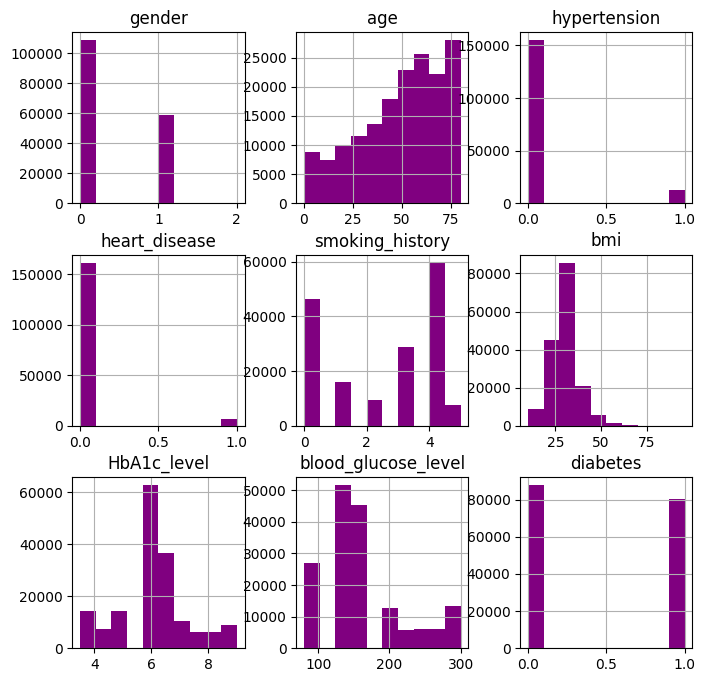

In [343]:
diabetes_data.hist(figsize=(8,8), color='purple')

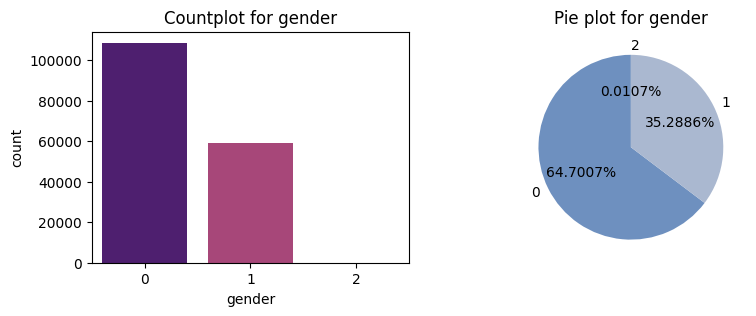

In [344]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))

# Countplot

sns.countplot(x=diabetes_data['gender'],data=diabetes_data ,palette='magma' ,ax=ax[0])

ax[0].set_title(f'Countplot for gender')

# Pie plot

data_counts = diabetes_data['gender'].value_counts()

ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))

ax[1].set_title(f'Pie plot for gender')

plt.show()

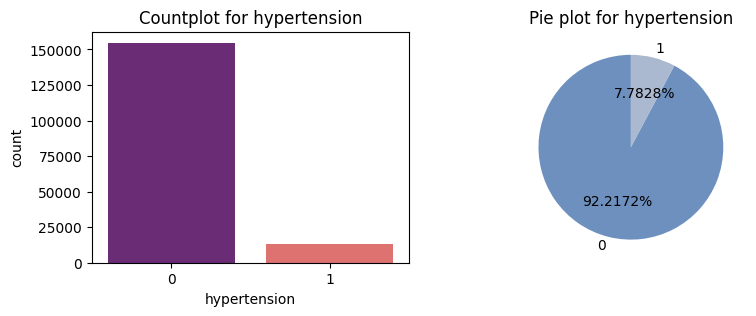

In [345]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))

# Countplot

sns.countplot(x=diabetes_data['hypertension'],data=diabetes_data ,palette='magma' ,ax=ax[0])

ax[0].set_title(f'Countplot for hypertension')

# Pie plot

data_counts = diabetes_data['hypertension'].value_counts()

ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))

ax[1].set_title(f'Pie plot for hypertension')

plt.show()


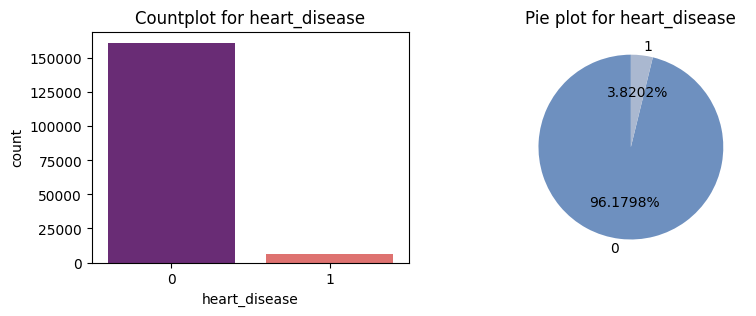

In [346]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))

# Countplot

sns.countplot(x=diabetes_data['heart_disease'],data=diabetes_data ,palette='magma' ,ax=ax[0])

ax[0].set_title(f'Countplot for heart_disease')

# Pie plot

data_counts = diabetes_data['heart_disease'].value_counts()

ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))

ax[1].set_title(f'Pie plot for heart_disease')

plt.show()

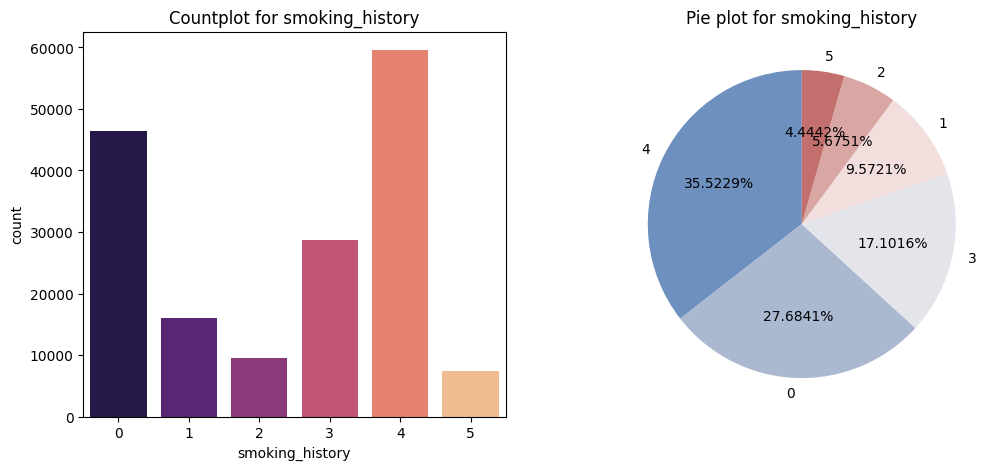

In [347]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Countplot

sns.countplot(x=diabetes_data['smoking_history'],data=diabetes_data ,palette='magma' ,ax=ax[0])

ax[0].set_title(f'Countplot for smoking_history')

# Pie plot

data_counts = diabetes_data['smoking_history'].value_counts()

ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))

ax[1].set_title(f'Pie plot for smoking_history')

plt.show()

In [348]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3))

# Countplot

sns.countplot(x=diabetes_data['diabetes'],data=diabetes_data ,palette='magma' ,ax=ax[0])

ax[0].set_title(f'Countplot for diabetes')

# Pie plot

data_counts = diabetes_data['diabetes'].value_counts()

ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.4f%%', startangle=90, colors=sns.color_palette('vlag'))

ax[1].set_title(f'Pie plot for diabetes')

Text(0.5, 1.0, 'Pie plot for diabetes')

In [349]:
print(diabetes_data['age'].mean())

49.95951558032483


**Phạm vi trung bình của những người mắc bệnh tiểu đường ở tuổi 49**




In [350]:
blood_glucose_level_above_70_and_less_than_100 = diabetes_data[(diabetes_data['blood_glucose_level'] <= 100) & (diabetes_data['blood_glucose_level'] >= 70)]

blood_glucose_level_above_70_and_less_than_100['blood_glucose_level'].value_counts().plot(kind='bar', color='#F89089')

plt.title('Nồng độ glucose trong máu khi nhịn ăn bình thường nằm trong khoảng từ 70 mg/dL (3.9 mmol/L) đến 100 mg/dL (5.6 mmol/L).)')

plt.xlabel('blood_glucose_level')

plt.ylabel('Số lượng bệnh nhân')

plt.show()

In [351]:
blood_glucose_level_above_200=diabetes_data[diabetes_data['blood_glucose_level']>=200]

blood_glucose_level_above_200['blood_glucose_level'].value_counts().plot(kind='bar', color='#F89089')

plt.title(' Nồng độ glucose trong máu trên 200 mg/dl có nghĩa là bệnh nhân bị tiểu đường.')

plt.xlabel('blood_glucose_level')

plt.ylabel('Số lượng bệnh nhân')

plt.show()

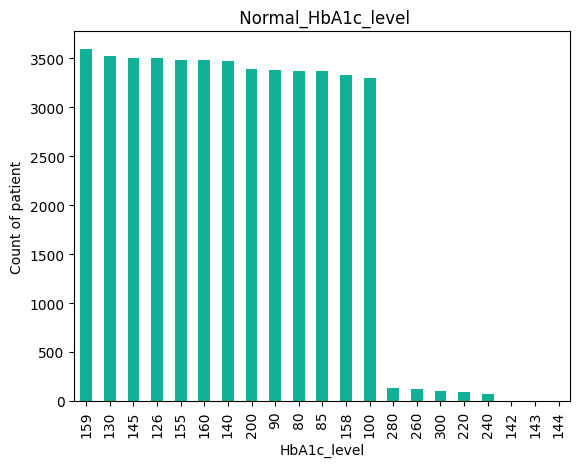

In [352]:
Normal_HbA1c_level=diabetes_data[diabetes_data['HbA1c_level']<=5.7]

Normal_HbA1c_level['blood_glucose_level'].value_counts().plot(kind='bar', color='#11B198')

plt.title(' Normal_HbA1c_level')

plt.xlabel('HbA1c_level')

plt.ylabel('Count of patient')

plt.show()

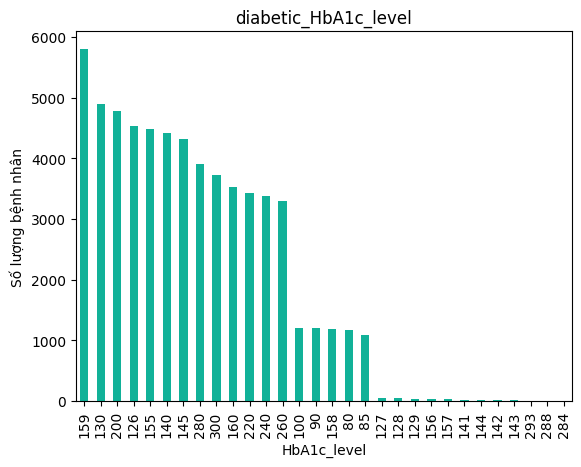

In [353]:
diabetic_HbA1c_level=diabetes_data[diabetes_data['HbA1c_level']>=6.5]

diabetic_HbA1c_level['blood_glucose_level'].value_counts().plot(kind='bar', color='#11B198')

plt.title('diabetic_HbA1c_level')

plt.xlabel('HbA1c_level')

plt.ylabel('Số lượng bệnh nhân')

plt.show()

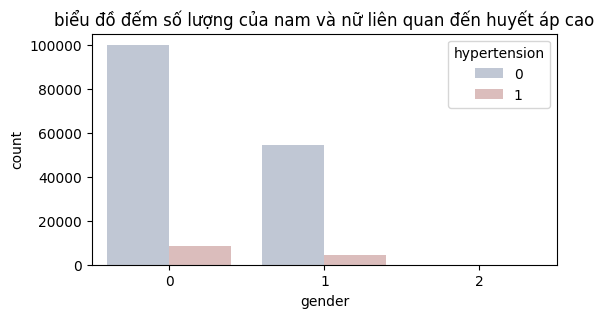

In [354]:
plt.figure(figsize=(6, 3))

sns.countplot(x=diabetes_data['gender'], hue=diabetes_data['hypertension'], data=diabetes_data ,palette='vlag' )

plt.title('biểu đồ đếm số lượng của nam và nữ liên quan đến huyết áp cao')

plt.show()

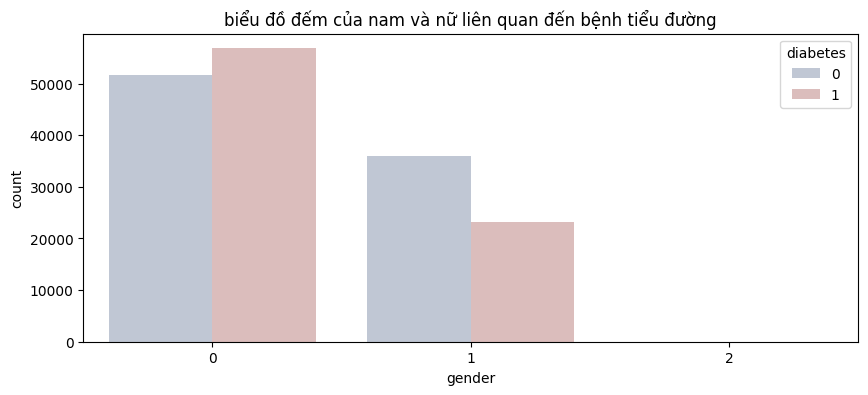

In [355]:
plt.figure(figsize=(10, 4))

sns.countplot(x=diabetes_data['gender'], hue=diabetes_data['diabetes'], data=diabetes_data ,palette='vlag' )

plt.title('biểu đồ đếm của nam và nữ liên quan đến bệnh tiểu đường')

plt.show()

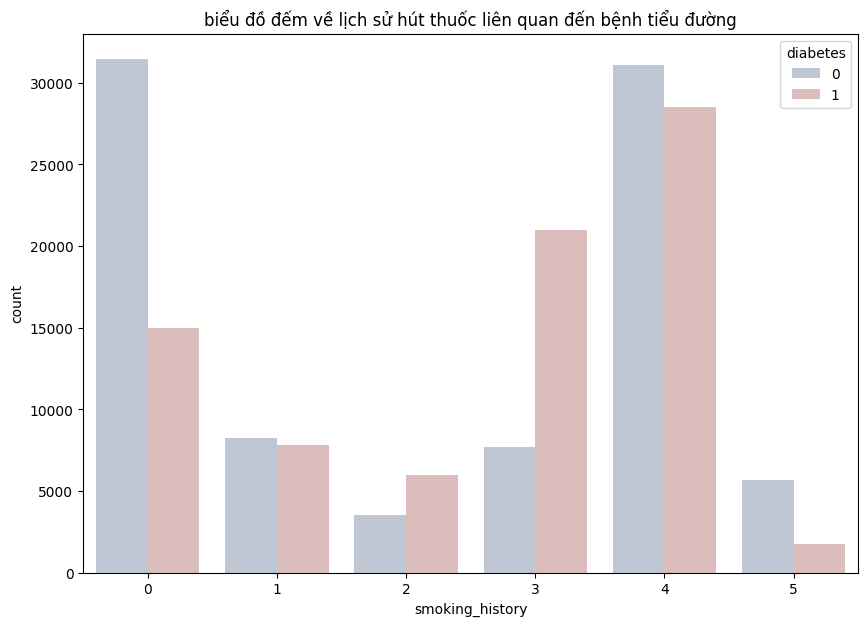

In [356]:
plt.figure(figsize=(10, 7))

sns.countplot(x=diabetes_data['smoking_history'], hue=diabetes_data['diabetes'], data=diabetes_data ,palette='vlag' )

plt.title('biểu đồ đếm về lịch sử hút thuốc liên quan đến bệnh tiểu đường')

plt.show()

In [357]:
diabetes_data.head()
print(diabetes_data[['smoking_history']].head(100))


    smoking_history
0                 4
1                 0
2                 4
3                 1
4                 1
..              ...
95                4
96                4
97                0
98                0
99                1

[100 rows x 1 columns]


# **CHIA TẬP DỮ LIỆU**

In [358]:
X = diabetes_data.drop('diabetes', axis=1)

y = diabetes_data['diabetes']

In [359]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167768 entries, 0 to 172019
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               167768 non-null  int64  
 1   age                  167768 non-null  float64
 2   hypertension         167768 non-null  int64  
 3   heart_disease        167768 non-null  int64  
 4   smoking_history      167768 non-null  int64  
 5   bmi                  167768 non-null  float64
 6   HbA1c_level          167768 non-null  float64
 7   blood_glucose_level  167768 non-null  int64  
 8   diabetes             167768 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 12.8 MB


In [360]:
#chuyển đổi dữ liệu phân loại thành dữ liệu số

# encoder=LabelEncoder()

# diabetes_data['gender']=encoder.fit_transform(diabetes_data['gender'])

# diabetes_data['smoking_history']=encoder.fit_transform(diabetes_data['smoking_history'])

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale dữ liệu (chỉ áp dụng cho cột số)
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler= scaler.transform(X_test)


In [361]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167768 entries, 0 to 172019
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               167768 non-null  int64  
 1   age                  167768 non-null  float64
 2   hypertension         167768 non-null  int64  
 3   heart_disease        167768 non-null  int64  
 4   smoking_history      167768 non-null  int64  
 5   bmi                  167768 non-null  float64
 6   HbA1c_level          167768 non-null  float64
 7   blood_glucose_level  167768 non-null  int64  
 8   diabetes             167768 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 12.8 MB


In [362]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167768 entries, 0 to 172019
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               167768 non-null  int64  
 1   age                  167768 non-null  float64
 2   hypertension         167768 non-null  int64  
 3   heart_disease        167768 non-null  int64  
 4   smoking_history      167768 non-null  int64  
 5   bmi                  167768 non-null  float64
 6   HbA1c_level          167768 non-null  float64
 7   blood_glucose_level  167768 non-null  int64  
 8   diabetes             167768 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 12.8 MB


In [363]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size = 0.2, stratify=y_resampled)

In [364]:
X_train.shape,X_test.shape,X.shape

((134214, 8), (33554, 8), (167768, 8))

# **LogisticRegression Model**

In [365]:
lr=LogisticRegression(max_iter=5000)

lr.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [366]:
y_predection=lr.predict(X_test)

In [367]:
lr_accuracy = accuracy_score(y_test, y_predection)

lr_conf_matrix = confusion_matrix(y_test, y_predection)

lr_classification_rep = classification_report(y_test, y_predection)

In [368]:
print(f'lr_Accuracy: {lr_accuracy:.3f}')

print('\nlr_Confusion Matrix:')

print(lr_conf_matrix)

print('\nlr_Classification Report:')

print(lr_classification_rep)

lr_Accuracy: 0.885

lr_Confusion Matrix:
[[15472  1852]
 [ 2000 14230]]

lr_Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89     17324
           1       0.88      0.88      0.88     16230

    accuracy                           0.89     33554
   macro avg       0.89      0.88      0.89     33554
weighted avg       0.89      0.89      0.89     33554



****KIỂM TRA CÓ BỊ over and under fiting ****

In [369]:
print("Training Score:",lr.score(X_train,y_train)*100,'%')

print("Testing Score:",lr.score(X_test,y_test)*100,'%')

Training Score: 88.64947024900532 %
Testing Score: 88.51999761578351 %


# **DecisionTree Model**

In [370]:
# Define the parameter grid to search

param_grid = {

    'max_depth': [3, 5, 10, None],  # depths to consider

    'min_samples_leaf': [1, 2, 4, 6] } # minimum number of samples required at a leaf node

In [371]:
decision_tree_model = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=10, n_jobs=-1)

In [372]:
decision_tree_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4, 6]})

In [373]:
y_pred_dt=decision_tree_model.predict(X_test)

In [374]:
# dt_accuracy = accuracy_score(y_test, y_pred_dt)

# dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)

# dt_classification_rep = classification_report(y_test, y_pred_dt)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# print("Accuracy:", accuracy_score(y_test, y_pred_dt))
# print("Precision:", precision_score(y_test, y_pred_dt))
# print("Recall:", recall_score(y_test, y_pred_dt))
# print("F1-score:", f1_score(y_test, y_pred_dt))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Confusion Matrix:
 [[16900   424]
 [  595 15635]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97     17324
           1       0.97      0.96      0.97     16230

    accuracy                           0.97     33554
   macro avg       0.97      0.97      0.97     33554
weighted avg       0.97      0.97      0.97     33554



In [375]:
# print(f'dt_Accuracy: {dt_accuracy:.2f}')

# print('\ndt_Confusion Matrix:')

# print(dt_conf_matrix)

# print('\ndt_Classification Report:')

**Checking for the over and under fiting**

In [376]:
print("Training Score:",decision_tree_model.score(X_train,y_train)*100,'%')

print("Testing Score:",decision_tree_model.score(X_test,y_test)*100,'%')

Training Score: 99.12676769934582 %
Testing Score: 96.96310424986588 %


# **RandomForest Model**

In [377]:
# Define the parameter grid to search

param_grid_ = {

    'n_estimators': [10, 50, 300, 200],  # Number of trees in the forest

    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree

    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node

    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node

}



# Initialize the grid search model

random_forest_model = GridSearchCV(RandomForestClassifier(n_estimators=200,class_weight='balanced'), param_grid=param_grid_, cv=10, n_jobs=-1)


In [378]:
random_forest_model = RandomForestClassifier()

random_forest_model.fit(X_train,y_train)

RandomForestClassifier()

In [379]:
y_pred_rf=random_forest_model.predict(X_test)

In [380]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)

rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

rf_classification_rep = classification_report(y_test, y_pred_rf)

In [381]:
print(f'rf_Accuracy: {rf_accuracy:.3f}')

print('\nrf_Confusion Matrix:')

print(rf_conf_matrix)

print('\nrf_Classification Report:')

print(rf_classification_rep)

rf_Accuracy: 0.974

rf_Confusion Matrix:
[[16943   381]
 [  497 15733]]

rf_Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     17324
           1       0.98      0.97      0.97     16230

    accuracy                           0.97     33554
   macro avg       0.97      0.97      0.97     33554
weighted avg       0.97      0.97      0.97     33554



**Checking for the over and under fiting**

In [382]:
print("Training Score:",random_forest_model.score(X_train,y_train)*100,'%')

print("Testing Score:",random_forest_model.score(X_test,y_test)*100,'%')

Training Score: 99.95380511720089 %
Testing Score: 97.38332240567443 %


In [383]:
import numpy as np

input_data = (1, 80.0, 0, 1, 1, 25.19, 6.6, 140)

input_data_as_numpy_array = np.asarray(input_data).reshape(1, -1)

# Scale input_data trước khi predict (sử dụng scaler đã fit trên train)
input_data_scaled = scaler.transform(input_data_as_numpy_array)

prediction = lr.predict(input_data_scaled)

print(prediction)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')


[0]
The person is not diabetic


In [384]:
input_data = (1,80.0,0,1,1,25.19,6.6,140)



# changing the input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)



# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



prediction = decision_tree_model.predict(input_data_reshaped)

print(prediction)



if (prediction[0] == 0):

  print('The person is not diabetic')

else:

  print('The person is diabetic')

[0]
The person is not diabetic


In [385]:
input_data = (1,80.0,0,1,1,25.19,6.6,140)



# changing the input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)



# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



prediction = random_forest_model.predict(input_data_reshaped)

print(prediction)



if (prediction[0] == 0):

  print('The person is not diabetic')

else:

  print('The person is diabetic')

[0]
The person is not diabetic


In [386]:
input_data = (1,54.0,0,1,0,27.32,6.6,80)



# changing the input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)



# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



prediction = random_forest_model.predict(input_data_reshaped)

print(prediction)



if (prediction[0] == 0):

  print('The person is not diabetic')

else:

  print('The person is diabetic')

[0]
The person is not diabetic


In [387]:
input_data = (1,54.0,0,1,0,27.32,6.6,80)



# changing the input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)



# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



prediction = decision_tree_model.predict(input_data_reshaped)

print(prediction)



if (prediction[0] == 0):

  print('The person is not diabetic')

else:

  print('The person is diabetic')

[0]
The person is not diabetic


In [388]:
input_data = (1,54.0,0,1,0,27.32,6.6,80)



# changing the input_data to numpy array

input_data_as_numpy_array = np.asarray(input_data)



# reshape the array as we are predicting for one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
input_data_scaled = scaler.transform(input_data_reshaped)


prediction = random_forest_model.predict(input_data_reshaped)

print(prediction)



if (prediction[0] == 0):

  print('The person is not diabetic')

else:

  print('The person is diabetic')

[0]
The person is not diabetic
